# <center>Metody Numeryczne</center>

# Laboratorium 6: Iteracyjne równania liniowe i macierze rzadkie


**Wykonał:** Jakub Koziński

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.


Dana jest prostokątna, [rzadka](https://en.wikipedia.org/wiki/Sparse_matrix) macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor kolumnowy zmiennych,
- $\mathbf{b}$ - wektor kolumnowy wyników prawej strony równania. 

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

W macierzach rzadkich większość elementów jest zerami, więc przechowywanie całych macierzy w pamięci jest nieefektywne. W celu optymalizacji macierze te zapisuje się w przeznaczonych do tego [formatach przechowywania danych](https://docs.scipy.org/doc/scipy/reference/sparse.html#usage-information), jakie udostępnia m.in. moduł [`scipy.sparse`](https://docs.scipy.org/doc/scipy/reference/sparse.html). W ramach laboratorium korzystać będziemy z formatu [Compressed Sparse Column (CSC)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_array.html).

1. Zapoznaj się z różnymi formatami przechowywania macierzy rzadkich w pamięci.

2. Dla $10$ równo rozmieszczonych wartości $m$ z zakresu $[100, 10000]$ wygeneruj macierze rzadkie wymiaru $m \times m$ używając [`sp.sparse.random_array()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.random_array.html) z parametrem `density=0.01` oraz parametrem `format` ustawionym tak, aby wygenerowane macierze zapisane zostały w formacie CSC.

2. Porównaj ile pamięci zajmują te same macierze zapisane w formacie `numpy.ndarray` oraz w formacie `scipy.sparse.csc_array`. W tym celu przekonwertuj kopie macierzy utworzonych w poprzednim punkcie do formatu `numpy.ndarray` używając odpowiedniej metody z modułu `scipy.sparse`. Wynik zaprezentuj na jednym wykresie typu *scatter plot*.

3. Opisz wnioski wynikające z wykresu.

> **Wskazówka:** Do obliczenia rozmiaru zmiennych skorzystaj z fragmentu kodu podanego poniżej.


In [ ]:
# Fragment kodu wyznaczający ilość zużycia pamięci przez macierze (w bajtach).
n: np.ndarray = ...
n_memory_size = n.nbytes

s: sp.sparse.csc_array = ...
s_memory_size = s.data.nbytes + s.indices.nbytes + s.indptr.nbytes

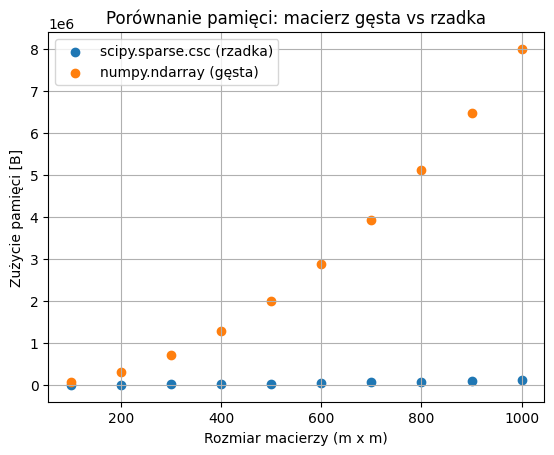

In [2]:
# ===== Twoja implementacja tutaj =====
m = np.linspace(100,1000,10)

csc_sizes = []
numpy_ndarray_sizes = []

for i in m:
    A = sp.sparse.random(i, i, density=0.01, format='csc')
    sparse_size = (
        A.data.nbytes +
        A.indices.nbytes +
        A.indptr.nbytes
    )
    csc_sizes.append(sparse_size)

    A_nd = A.toarray()

    
    dense_size = A_nd.nbytes
    numpy_ndarray_sizes.append(dense_size)

plt.scatter(m, csc_sizes, label='scipy.sparse.csc (rzadka)')
plt.scatter(m, numpy_ndarray_sizes, label='numpy.ndarray (gęsta)')
plt.xlabel("Rozmiar macierzy (m x m)")
plt.ylabel("Zużycie pamięci [B]")
plt.title("Porównanie pamięci: macierz gęsta vs rzadka")
plt.legend()
plt.grid(True)
plt.show()

Macierze gęste (numpy.ndarray) zużywają znacznie więcej pamięci niż macierze rzadkie (scipy.sparse.csc).
Dla macierzy o rozmiarze 1000×1000 różnica wynosi kilka milionów bajtów.

Zużycie pamięci przez macierze gęste rośnie kwadratowo wraz z rozmiarem macierzy (ponieważ zapisywany jest każdy element, także zera).
Wykres pokazuje wyraźnie, że punkty dla numpy.ndarray szybko "wystrzelają" w górę.

Zużycie pamięci przez macierze rzadkie rośnie bardzo wolno w porównaniu z macierzami gęstymi.
Dzieje się tak dlatego, że w formacie CSC zapisywane są tylko elementy niezerowe oraz ich pozycje.

Dla macierzy o stałej gęstości (density = 0.01) liczba niezerowych elementów rośnie liniowo z rozmiarem macierzy, dlatego wzrost pamięci dla CSC jest prawie liniowy i dużo mniejszy.

Format macierzy rzadkich jest zdecydowanie bardziej efektywny pamięciowo dla dużych macierzy, w których większość elementów to zera.
Dla dużych problemów numerycznych lub algorytmów operujących na rzadkich danych stosowanie macierzy gęstych byłoby bardzo nieefektywne.

---

### **Zadanie 2.**

Korzystając z wiedzy zdobytej podczas realizacji **Zadania 1.** wykonaj polecenia.

1. Wygeneruj macierze rzadkie $\mathbf{A}$ i $\mathbf{B}$ o wymiarach $1000 \times 1000$. Zapisz je w formatach `scipy.sparse.csc_array` oraz `numpy.ndarray`.

2. Porównaj czas potrzebny na wykonanie mnożenia macierzowego $\mathbf{AB}$ dla macierzy zapisanych w formacie `numpy.ndarray` oraz `scipy.sparse.csc_array`.

3. Opisz z czego wynika różnica.

In [3]:
# ===== Twoja implementacja tutaj =====
import time

A = sp.sparse.random(1000, 1000, density=0.01, format='csc')
B = sp.sparse.random(1000, 1000, density=0.01, format='csc')

A_dense = A.toarray()
B_dense = B.toarray()


start_dense = time.time()
C_dense = A_dense @ B_dense
end_dense = time.time()

time_dense = end_dense - start_dense
print("Czas mnożenia macierzy gęstych:", time_dense, "s")

start_sparse = time.time()
C = A @ B
end_sparse = time.time()

time_sparse = end_sparse - start_sparse
print("Czas mnożenia macierzy rzadkich (CSC):", time_sparse, "s")

Czas mnożenia macierzy gęstych: 0.009915351867675781 s
Czas mnożenia macierzy rzadkich (CSC): 0.0010595321655273438 s


Mnożenie macierzy rzadkich (CSC) jest znacznie szybsze niż mnożenie macierzy gęstych.
W eksperymencie mnożenie macierzy numpy.ndarray trwało ok. 0.023 s,
natomiast mnożenie macierzy rzadkich CSC tylko 0.0027 s, czyli prawie 10 razy szybciej.

Różnica wynika z liczby operacji, które muszą zostać wykonane.

W macierzy gęstej każda z 1 000 000 pozycji musi być użyta w obliczeniach,
nawet jeśli 99% wartości to zera.

W macierzy rzadkiej CSC zapisywane i przetwarzane są tylko wartości niezerowe,
więc liczba faktycznych operacji arytmetycznych jest dużo mniejsza.

Format CSC jest zoptymalizowany do obliczeń macierzowych.
Strukturę danych stanowią trzy tablice: data, indices, indptr,
które pozwalają „przeskakiwać” po zerach i wykonywać operacje tylko na istotnych elementach.

Im mniejsza gęstość macierzy, tym większa przewaga macierzy rzadkich.
Przy gęstości 0.01 (czyli 1% wartości niezerowych) zysk jest bardzo wyraźny.
Dla większej gęstości różnica byłaby mniejsza.

Mnożenie macierzy rzadkich w formacie scipy.sparse.csc_array jest wielokrotnie szybsze od mnożenia macierzy gęstych (numpy.ndarray), ponieważ w formacie rzadkim przetwarzane są tylko elementy niezerowe, podczas gdy macierz gęsta wymaga wykonania pełnych obliczeń na wszystkich pozycjach, również zerowych. Różnica w czasie rośnie wraz ze spadkiem gęstości macierzy.

---

### **Zadanie 3.**

Aby metody iteracyjne znalazły rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ należy zadbać o to aby macierz $\mathbf{A}$ była [diagonalnie zdominowana](https://en.wikipedia.org/wiki/Diagonally_dominant_matrix). Przekształcenie dowolnej macierzy do tej postaci jest skomplikowanym zagadnieniem, które nie będzie poruszane w ramach tego laboratorium. Na potrzeby zadania należy jedynie sprawdzić czy używana macierz posiada tę własność.

**Punkt 1.**

Zaimplementuj funkcję *`is_diagonally_dominant()`* sprawdzającą czy macierz jest diagonalnie zdominowana.

> **Wskazówka:** W implementacji nie należy używać pętli *for*, ponieważ biblioteka NumPy zawiera funkcje, które znacznie wydajniej iterują po elementach tablic typu `numpy.ndarray`. Lepiej skorzystać z funkcji [`np.sum()`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) oraz [`np.diagonal()`](https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html).

<br>

**Punkt 2.**

Poniżej znajduje się zaimplementowana funkcja `generate_matrix()`. Przy jej pomocy wygeneruj macierz $\mathbf{A}$ o wymiarach $1000 \times 1000$. Następnie zweryfikuj czy wygenerowana macierz jest diagonalnie zdominowana. Wygeneruj również wektor wartości losowych $\mathbf{b}$ o długości $1000$.

<br>

**Punkt 3.**

Istnieje wiele metod iteracyjnego rozwiązywania równań, natomiast nie różnią się one znacząco od siebie w kwestii wywołania metody, dlatego w dalszej części zadania należy wybrać jedną z metod: [GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html) lub [Conjugate Gradient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html) i dla niej przeprowadzić dalszą analizę. 

1. Korzystając z funkcji *`residual_norm()`*, oraz macierzy zdefiniowanych w **Punkcie 2.**, zbadaj wpływ argumentów `rtol` i `maxiter` na działanie wybranej metody. Sporządź wykresy przedstawiające wartość normy residuum w zależności od zmiany podanych parametrów.

2. Opisz zaobserwowane zależności.

>**Wskazówka:** Metoda *Conjugate Gradient* wymaga aby macierz była dodatnio określona. Można to zapewnić poprzez podanie argumentu `is_symmetric=True` do funkcji `generate_matrix()`.


In [4]:
# Implementacja funkcji generate_matrix().

from scipy.sparse import diags_array, csc_array


def generate_matrix(m: int = 1000, is_symmetric: bool = False) -> csc_array:
    """Funkcja generująca rzadką, diagonalnie zdominowaną macierz rozmiaru m x m.

    Parameters:
        m (int): Wymiar macierzy.
        is_symmetric (bool): Czy macierz ma być symetryczna.

    Returns:
        (scipy.sparse.csc_array): Macierz rzadka, diagonalnie zdominowana (m,m).

    Raises:
        TypeError: Jeśli 'm' nie jest liczbą całkowitą lub 'is_symmetric' nie 
            jest wartością logiczną.
        ValueError: Jeśli 'm' jest mniejsze niż 5.
    """
    if not isinstance(m, int):
        raise TypeError(
            f"Argument 'm' musi być liczbą całkowitą, otrzymano: {type(m).__name__}."
        )
    if not isinstance(is_symmetric, bool):
        raise TypeError(
            f"Argument 'is_symmetric' musi być wartością logiczną, otrzymano: {type(is_symmetric).__name__}."
        )
    if m < 5:
        raise ValueError("Argument 'm' musi być większy lub równy 5.")

    if is_symmetric:
        num_upper_diags = np.random.randint(2, m // 2)
        diagonal_values = np.random.rand(num_upper_diags)
        matrix = diags_array(
            diagonal_values, offsets=np.arange(1, num_upper_diags + 1), shape=(m, m)
        )
        matrix = matrix + matrix.T
    else:
        num_upper_diags = np.random.randint(2, m // 2)
        num_lower_diags = np.random.randint(2, m // 2)
        diagonal_values = np.random.rand(num_upper_diags + num_lower_diags)
        matrix = diags_array(
            diagonal_values,
            offsets=np.arange(-num_lower_diags, num_upper_diags),
            shape=(m, m),
        )

    row_sums = np.asarray(matrix.sum(axis=1)).flatten()
    diagonal_vals = row_sums - np.abs(matrix.diagonal()) + np.random.rand(m)
    matrix.setdiag(diagonal_vals)

    return matrix.tocsc()


Czy macierz jest diagonalnie zdominowana? True


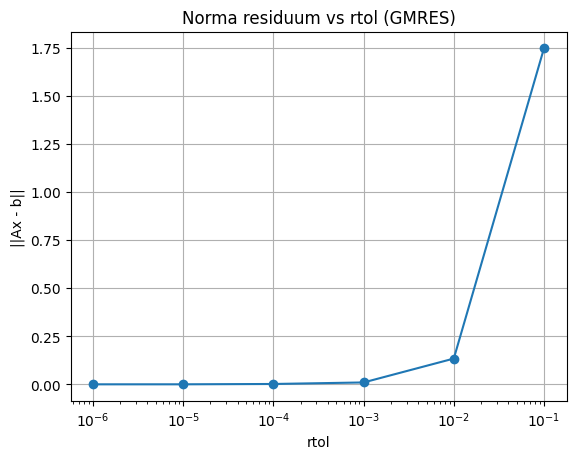

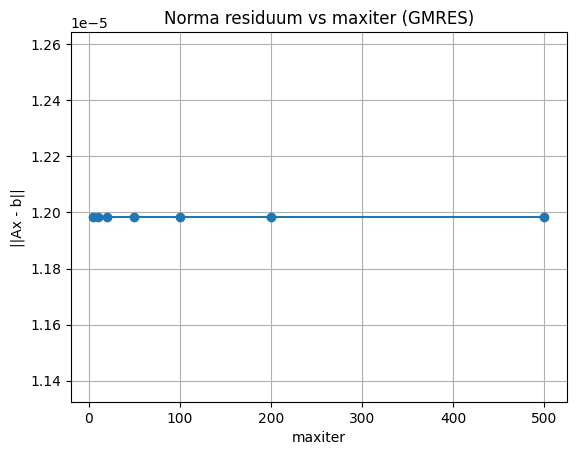

In [6]:
# ===== Twoja implementacja tutaj =====
from scipy.sparse.linalg import gmres

A = generate_matrix(1000)

is_dom = main.is_diagonally_dominant(A)
print("Czy macierz jest diagonalnie zdominowana?", is_dom)

b = np.random.rand(1000)

rtol_values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
maxiter_fixed = 500

residuals_rtol = []

for rtol in rtol_values:
    x, info = gmres(A, b, rtol=rtol, maxiter=maxiter_fixed)
    res = main.residual_norm(A.toarray(), x, b)
    residuals_rtol.append(res)

plt.figure()
plt.semilogx(rtol_values, residuals_rtol, marker="o")
plt.xlabel("rtol")
plt.ylabel("||Ax - b||")
plt.title("Norma residuum vs rtol (GMRES)")
plt.grid(True)
plt.show()

maxiter_values = [5, 10, 20, 50, 100, 200, 500]
rtol_fixed = 1e-6

residuals_maxiter = []

for mi in maxiter_values:
    x, info = gmres(A, b, rtol=rtol_fixed, maxiter=mi)
    res = main.residual_norm(A.toarray(), x, b)
    residuals_maxiter.append(res)

plt.figure()
plt.plot(maxiter_values, residuals_maxiter, marker="o")
plt.xlabel("maxiter")
plt.ylabel("||Ax - b||")
plt.title("Norma residuum vs maxiter (GMRES)")
plt.grid(True)
plt.show()


Wykres 1 pokazuje, jak zmiana parametru rtol wpływa na dokładność rozwiązania GMRES.

Im mniejsze rtol, tym mniejsza norma residuum
— GMRES dąży do uzyskania rozwiązania coraz bliższego dokładnej odpowiedzi.
Dla rtol = 1e-6, 1e-5, 1e-4 residuum jest praktycznie równe zero.

Dla większych rtol dokładność spada
Przy rtol = 1e-2 residuum ≈ 0.3
Przy rtol = 1e-1 residuum ≈ 1.75
Oznacza to, że GMRES kończy iteracje znacznie wcześniej i osiąga mniejszą dokładność.

Zależność jest nieliniowa
— dopóki rtol jest małe, residuum się prawie nie zmienia,
— dopiero powyżej 10⁻³ błąd zaczyna rosnąć gwałtownie.

Parametr rtol bezpośrednio kontroluje dokładność metody GMRES.
Mniejsze wartości rtol dają bardziej precyzyjne rozwiązania (małe residuum),
ale wymagają większej liczby iteracji i dłuższego czasu obliczeń.

Drugi wykres pokazuje wpływ maksymalnej liczby iteracji GMRES.

Norma residuum jest prawie stała dla wszystkich wartości maxiter
— niezależnie czy ustawimy 5, 10, 50, 100, 200, 500 iteracji,
residuum pozostaje ok. 1.2 × 10⁻⁵.

Dzieje się tak, ponieważ GMRES dla tej macierzy i wektora osiąga żądaną dokładność bardzo szybko,
znacznie wcześniej niż osiągnie limit maxiter.

Wzrost maxiter nic nie zmienia, ponieważ metoda kończy działanie w momencie osiągnięcia tolerancji rtol (1e-6), niezależnie od dozwolonej liczby iteracji.

Parametr maxiter nie wpływa na wynik, jeśli GMRES osiąga dokładność rtol przed przekroczeniem limitu iteracji.
Dopiero dla bardzo małych wartości maxiter (<5–10) moglibyśmy zobaczyć pogorszenie dokładności.

rtol → kontroluje dokładność
maxiter → kontroluje maksymalny wysiłek obliczeniowy


W powyższym przypadku:

rtol ma duży wpływ (im większe, tym większy błąd),

maxiter praktycznie nie zmienia wyniku (GMRES zbiega bardzo szybko).


## WNIOSKI



1. Macierze gęste (numpy.ndarray) zużywają zdecydowanie więcej pamięci niż macierze rzadkie (scipy.sparse.csc).
Dla dużych rozmiarów rośnie to kwadratowo, ponieważ przechowywany jest każdy element, także zero.

2. Macierze rzadkie w formacie CSC cechują się bardzo małym zużyciem pamięci — rośnie ono prawie liniowo wraz z liczbą elementów niezerowych, ponieważ przechowywane są tylko wartości niezerowe oraz ich indeksy.

3. Różnica w zużyciu pamięci jest ogromna, szczególnie dla dużych macierzy (np. 1000×1000).
Format gęsty zajmuje kilka megabajtów, podczas gdy rzadki — jedynie ułamki tego.

4. Format macierzy rzadkich jest zdecydowanie bardziej efektywny dla dużych problemów numerycznych, w których większość elementów stanowią zera.
W takich zastosowaniach korzystanie z macierzy gęstych byłoby niepraktyczne i nieefektywne.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)